In [ ]:
PATHS MIGHT NEED TO BE FIXED TO RUN THESE CELLS

# THis file is just testing graphs nothing special

In [1]:
import pandas as pd

file_path = r'..\dataset\millionSongs.csv'

df = pd.read_csv(file_path, nrows=1)
print(df.iloc[0])

id                        7lmeHLHBe4nmXzuXc0HDjk
name                                     Testify
album                  The Battle Of Los Angeles
album_id                  2eia0myWFgoHuttJytCxgX
artists             ['Rage Against The Machine']
artist_ids            ['2d0hyoQ5ynDBnkvAbJKORj']
track_number                                   1
disc_number                                    1
explicit                                   False
danceability                                0.47
energy                                     0.978
key                                            7
loudness                                  -5.399
mode                                           1
speechiness                               0.0727
acousticness                              0.0261
instrumentalness                        0.000011
liveness                                   0.356
valence                                    0.503
tempo                                    117.906
duration_ms         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("..\dataset\millionSongs.csv")

# take the features
mesh = df[["danceability","energy","year"]].sample(10000, random_state=42)

plt.scatter(mesh["danceability"], mesh["energy"], 
            c=mesh["year"], cmap="viridis", s=2)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Sample of 10k songs")
plt.colorbar(label="Year")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mesh = df[["danceability","energy"]].sample(100000, random_state=42)

# normalize to [0,1]
dx = (mesh["danceability"] - mesh["danceability"].min()) / (mesh["danceability"].max() - mesh["danceability"].min())
dy = (mesh["energy"] - mesh["energy"].min()) / (mesh["energy"].max() - mesh["energy"].min())

# polar coordinates
r = np.sqrt(dx**2 + dy**2)
theta = np.arctan2(dy, dx) + r * 10  # twist factor

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.scatter(x, y, c=theta, cmap='hsv', s=2)
plt.axis('equal')
plt.show()


In [ ]:
x = dx * 4 * np.pi
y = dy + np.sin(dx * 10) * 0.1

plt.scatter(x, y, c=dy, cmap='plasma', s=2)
plt.show()


In [ ]:
angle = dx * 2 * np.pi
radius = dy

x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.scatter(x, y, c=dx, cmap='viridis', s=2)
plt.axis('equal')
plt.show()


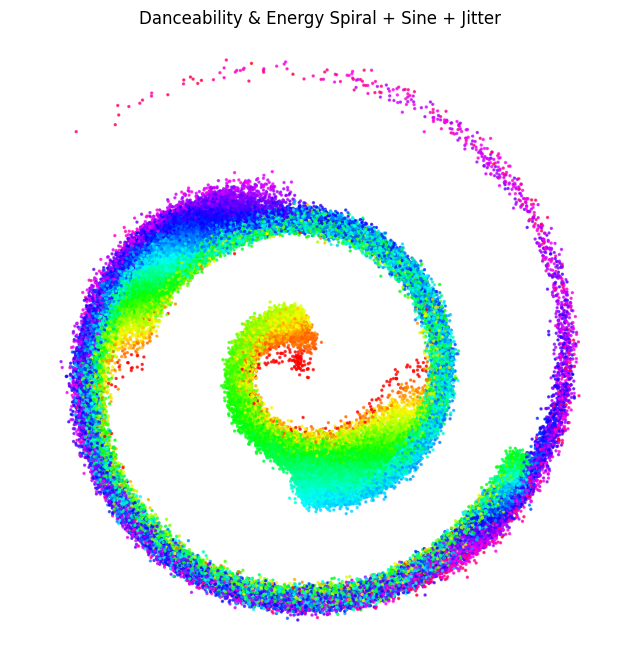

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/md/md.csv")

mesh = df[["danceability","energy","year"]].sample(100000, random_state=42)

dx = (mesh["danceability"] - mesh["danceability"].min()) / (mesh["danceability"].max() - mesh["danceability"].min())
dy = (mesh["energy"] - mesh["energy"].min()) / (mesh["energy"].max() - mesh["energy"].min())

# ----------------------------
# testing spiral
r = np.sqrt(dx**2 + dy**2)
theta = np.arctan2(dy, dx) + r * 10  # global spiral twist

# Sine wave modulation
theta += np.sin(r * 20) * 0.5     # wiggle spiral
r += np.sin(r * 15) * 0.05        # radius wiggle

# Random jitter here...
r_jitter = r + np.random.rand(len(r)) * 0.05  # radial jitter
x_final = r_jitter * np.cos(theta) + np.random.randn(len(r))*0.02
y_final = r_jitter * np.sin(theta) + np.random.randn(len(r))*0.02

plt.figure(figsize=(8,8))
plt.scatter(x_final, y_final, c=dx, cmap='hsv', s=2, alpha=0.7)
plt.axis('equal')
plt.axis('off')
plt.title("Danceability & Energy Spiral + Sine + Jitter")
plt.show()
